# Importing Necessary Libraries and CSV files

# Data Description


Data description ìe-shop clothing 2008î

Variables:

1. YEAR (2008)

========================================================

2. MONTH -> from April (4) to August (8)

========================================================

3. DAY -> day number of the month

========================================================

4. ORDER -> sequence of clicks during one session

========================================================

5. COUNTRY -> variable indicating the country of origin of the IP address with the
following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)

========================================================

6. SESSION ID -> variable indicating session id (short record)

========================================================

7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
1-trousers
2-skirts
3-blouses
4-sale

========================================================

8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product
(217 products)

========================================================

9. COLOUR -> colour of product

1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white

========================================================

10. LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right

========================================================

11. MODEL PHOTOGRAPHY -> variable with two categories:

1-en face
2-profile

========================================================

12. PRICE -> price in US dollars

========================================================

13. PRICE 2 -> variable informing whether the price of a particular product is higher than
the average price for the entire product category

1-yes
2-no

========================================================

14. PAGE -> page number within the e-store website (from 1 to 5)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++

If you use this dataset, please cite:

£apczyÒski M., Bia≥owπs S. (2013) Discovering Patterns of Users' Behaviour in an E-shop -
Comparison of Consumer Buying Behaviours in Poland and Other European Countries,
ìStudia Ekonomiczneî, nr 151, ìLa sociÈtÈ de l'information : perspective europÈenne et
globale : les usages et les risques d'Internet pour les citoyens et les consommateursî, p. 144-
153.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++




# Importing Required Modules

In [1]:
# Importing Necessary Libraries for running the code logic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from dataclasses import dataclass, field
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [2]:
# Importing the data from the CSV place in the local drive into a data variable data set
data = pd.read_csv('/content/e-shop clothing 2008.csv',delimiter=';')

In [3]:
# Visual the csv loaded data into data variable
data

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


# Data Pre-Processing For EDA

In [4]:
# Initially visualizing the data columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [5]:
# Categorizing the Mapping into numericals
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}

In [6]:
# Alter the data so that the column Country is of string type
data['country'] = data['country'].astype("string")
data["country"] = data["country"].map(country_map)

In [7]:
# Defining the mapping of page 1 according to what type of article it is
page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
data["page 1 (main category)"] = data["page 1 (main category)"].map(page1_map)

In [8]:
# Defining the location map with its orientation to its numerical value
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

data["location"] = data["location"].map(location_map)

In [9]:
# Defining the color mapping to its numerical value
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

data["colour"] = data["colour"].map(color_map)

In [10]:
# Defining the model mapping
model_map = {
    1: "En face",
    2: "Profile"}

data["model photography"] = data["model photography"].map(model_map)

In [11]:
# Define and categorize the Monthly mapping
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

data["month"] = data["month"].map(month_map)

# Exploratory Data Analysis

In [12]:
# Grouping by 'country' and counting occurrences of 'price'
price_count = data.groupby('country')['price'].count()

# Sorting values in descending order
price_count = price_count.sort_values(ascending=False)

# Filtering countries with more than 100 occurrences
price_count = price_count[price_count > 100]

# Creating a bar plot using Plotly Express
fig = px.bar(x=price_count.index, y=price_count.values, labels={'x': 'Country', 'y': 'Number of Visitors'})
fig.show()

In [13]:
# Calculate total orders per country and sort in descending order
total_orders = data.groupby('country')['order'].sum()
total_orders = total_orders.sort_values(ascending=False)

# Calculate count of orders per country and sort in descending order
order_count = data.groupby('country')['order'].count()
order_count = order_count.sort_values(ascending=False)

# Calculate average clicks per country
average_clicks = total_orders / order_count

# Combine results and sort by average clicks in descending order
result_df = pd.DataFrame({'total_orders': total_orders, 'average_clicks': average_clicks})
result_df = result_df.sort_values(['average_clicks'], ascending=False)

# Filter for countries with average clicks greater than 3
result_df = result_df[result_df['average_clicks'] > 3]

In [14]:
# Creating a scatter plot using Plotly Express
fig = px.scatter(result_df, x=result_df.index, y="average_clicks",
                 size="average_clicks", color=result_df.index, size_max=60)

# Updating the traces for the existing graphs
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Updating the layout of the existing graph
fig.update_layout(title='Average Clicks per Country',
                  xaxis_title='Country',
                  yaxis_title='Average Clicks')

fig.show()

In [15]:
# Which is the best selling category
category_count = data.groupby("page 1 (main category)")[["price"]].count()
category_sales = data.groupby("page 1 (main category)")[["price"]].sum()

# Create a donut chart for total count per category
fig1 = go.Figure(data=[go.Pie(labels=category_count.index, values=category_count["price"], hole=0.5)])
fig1.update_layout(title="Total Count per Category")

# Create a donut chart for total sales per category
fig2 = go.Figure(data=[go.Pie(labels=category_sales.index, values=category_sales['price'], hole=0.5)])
fig2.update_layout(title="Total Sales per Category")

fig1.show()
fig2.show()


It looks like trousers are preferred for purchases, even though our categories show a fairly distributed pattern.

In [16]:
#What does customers buy from each page?
Count = data.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

# Visualizing the Bar graph
fig = px.bar(data_frame= Count, x="page", y="counts",
             color="page 1 (main category)", barmode="group",
             labels={'counts': 'Count', 'page': 'Page', 'page 1 (main category)': 'Main Category'},
             title='Counts of Pages by Main Category')

fig.update_layout(xaxis_title='Page', yaxis_title='Count')
fig.show()

The first page is the most effective for selling, particularly for trousers and skirts categories.

The last page appears to be favored for sale products.

**Analysis indicates that:**

On page 1, trousers outperform other products.

On page 2, skirts show better performance compared to other products.

On page 3, blouses demonstrate better sales compared to other products.

Ultimately, on pages 4 and 5, users seem to target sales items more prominently.

In [17]:
#What is the most attractable section in page and color of product per type?
# Grouping the data by location and color to obtain counts
item_counts_by_location_color = data.groupby(by=["location", "colour"]).size().reset_index(name="counts")

# Creating a scatter plot to visualize item counts by location and color
fig = px.scatter(item_counts_by_location_color, x="location", y="counts",
                 color='colour', size='counts', size_max=30,
                 labels={'counts': 'Count', 'location': 'Location', 'colour': 'Color'},
                 title='Item Counts by Location and Color')

fig.update_layout(xaxis_title='Location', yaxis_title='Count')
fig.show()

The bottom-left and top-left sections draw the most attention on the website.

In the top section, users tend to favor products with a blue color.

For the bottom-left and bottom-right sections, users show a preference for products in black color.

In the bottom-middle section, users prefer products that have multiple colors.

In [18]:
#Should we put model photography in the face of the product or in the inside the profile ?

# Grouping the data by 'model photography' and 'page 1 (main category)' to calculate counts
counts_by_model_photography = data.groupby(by=["model photography", 'page 1 (main category)'])['price'].count().reset_index(name="counts")

# Generating a grouped bar chart using Plotly Express
fig = px.bar(data_frame=counts_by_model_photography, x="model photography", y="counts",
             color="page 1 (main category)", barmode="group",
             labels={'counts': 'Count', 'model photography': 'Model Photography', 'page 1 (main category)': 'Main Category'},
             title='Counts by Model Photography and Main Category')

fig.update_layout(xaxis_title='Model Photography', yaxis_title='Count')
fig.show()

YES we should put model photography en face of the products

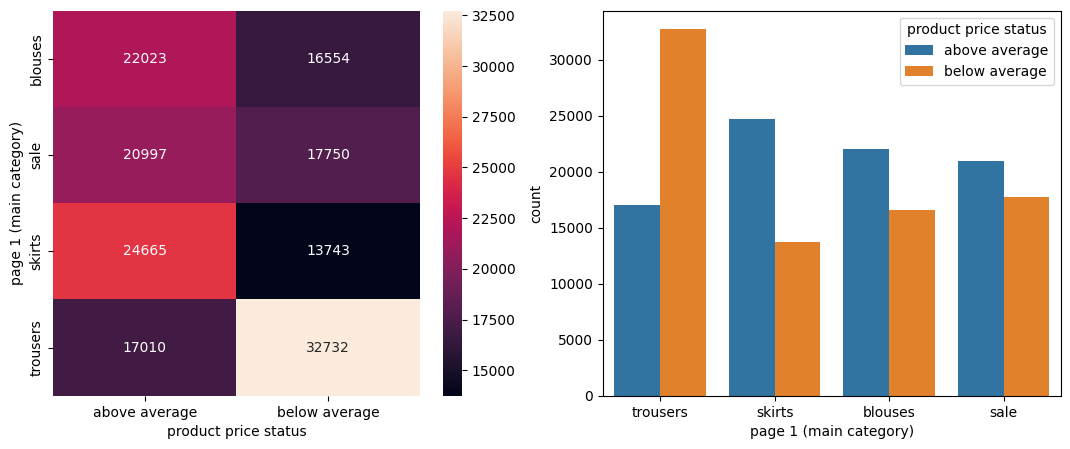

In [19]:
#Does users seek cheaper products ?

# Copying the DataFrame for modification
df_copy = data.copy()

# Function to categorize prices based on average
def categorize_price(price):
    if price == 1:
        return 'above average'
    elif price == 2:
        return 'below average'

# Applying the function to create a new column 'product price status'
df_copy['product price status'] = df_copy['price 2'].apply(categorize_price).astype('category')

plt.figure(figsize=(13, 5))

# LEFT plot: Heatmap
plt.subplot(1, 2, 1)

# Grouping the data and getting counts for each combination of variables
ct_counts = df_copy.groupby(['page 1 (main category)', 'product price status']).size().reset_index(name='count')
ct_counts = ct_counts.pivot(index='page 1 (main category)', columns='product price status', values='count')
sns.heatmap(ct_counts, annot=True, fmt='d')

# RIGHT plot: Clustered box plot
plt.subplot(1, 2, 2)
sns.countplot(data=df_copy, x='page 1 (main category)', hue='product price status')

plt.show()


yes it is the case with trousers, but the other items the users are prefering quality products

Checking for missing values

In [20]:
# Here we are defing the data along with missing values
total_rows = len(data)
missing_columns = data.columns[data.isnull().any()].tolist()

for col in missing_columns:
    null_count = data[col].isnull().sum()
    percentage = (null_count / total_rows) * 100
    print(f"{col}: {null_count} missing values ({round(percentage, 3)}%)")

In [21]:
# Removing the column session id as it is not useful
data.drop('session ID', axis=1, inplace=True)

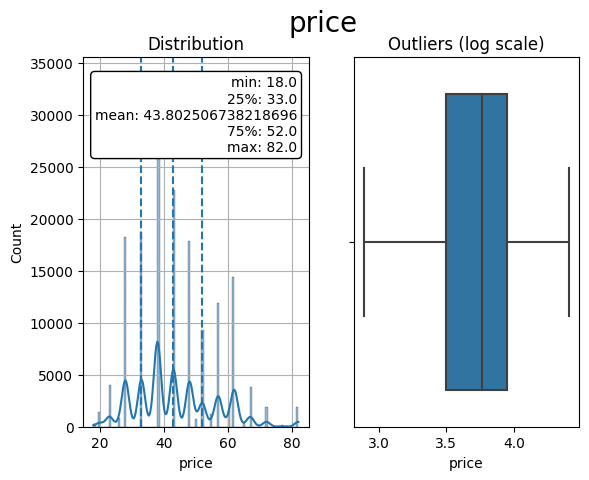

In [22]:
# Plot the graph
x = "price"
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)

# Distribution plot
ax[0].set_title('Distribution')
sns.histplot(data=data, x=x, kde=True, ax=ax[0])
des = data[x].describe()
for percentile in [25, 50, 75]:
    ax[0].axvline(np.percentile(data[x], percentile), ls='--')
ax[0].grid(True)
box = '\n'.join((
    f"min: {des['min']}",
    f"25%: {des['25%']}",
    f"mean: {des['mean']}",
    f"75%: {des['75%']}",
    f"max: {des['max']}"
))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

# Boxplot with log scale for outliers
ax[1].set_title('Outliers (log scale)')
tmp_dtf = data[x].copy()
tmp_dtf = np.log(tmp_dtf)
sns.boxplot(x=tmp_dtf, ax=ax[1])
plt.show()


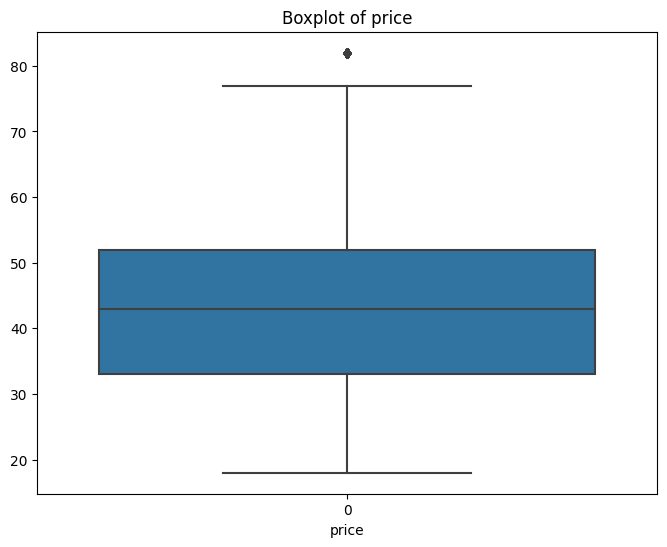

In [23]:
# Plot a box plot with the above data
x = "price"
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[x])
plt.title(f'Boxplot of {x}')
plt.xlabel(x)
plt.show()

# Model prepration

In [24]:
# Preparing the data for a model visualization
data['year'] = data['year'].apply(str)
data['day'] = data['day'].apply(str)
data['page'] = data['page'].apply(str)
data['order'] = data['order'].apply(str)

In [25]:
# Tracing out the raw data and its columns and its data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  object
 1   month                    165474 non-null  object
 2   day                      165474 non-null  object
 3   order                    165474 non-null  object
 4   country                  165474 non-null  object
 5   page 1 (main category)   165474 non-null  object
 6   page 2 (clothing model)  165474 non-null  object
 7   colour                   165474 non-null  object
 8   location                 165474 non-null  object
 9   model photography        165474 non-null  object
 10  price                    165474 non-null  int64 
 11  price 2                  165474 non-null  int64 
 12  page                     165474 non-null  object
dtypes: int64(2), object(11)
memory usage: 16.4+ MB


Using Auto encoder to encode the data

In [26]:
# From the SKlearn library, use the  label encoder to process the data
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col])
        encoders[col] = label_encoder

In [27]:
# as price 2 is 1 and 2
data["price 2"] = data["price 2"] - 1
data.head()

,year,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,0,0,0,0,27,3,4,0,0,0,28,1,0
1,0,0,0,107,27,3,7,0,2,0,33,1,0
2,0,0,0,118,27,2,70,9,3,0,52,0,0
3,0,0,0,129,27,2,51,5,2,1,38,1,0
4,0,0,0,140,27,2,74,3,5,1,52,0,0


# Scaling and Standardization

In [28]:
# From the libraries lets scale the data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original dataset

# Selecting numerical columns for scaling (excluding 'price 2')
numerical_columns = ['year', 'month', 'day', 'order', 'country', 'page 1 (main category)',
                     'page 2 (clothing model)', 'colour', 'location', 'model photography',
                     'price','page']

# Extract 'price 2' separately (to be concatenated later)
price_2_column = data['price 2']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns in your dataset (excluding 'price 2')
scaled_data = scaler.fit_transform(data[numerical_columns])

# Create a DataFrame from the scaled array
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Concatenate 'price 2' column with the scaled DataFrame
scaled_df['price 2'] = price_2_column

In [29]:
# Gather the statistics summary
summary_stats = scaled_df.describe()
summary_stats

,year,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,page,price 2
count,165474.0,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,1.654740e+05,165474.000000
mean,0.0,-1.593927e-16,1.648890e-17,6.956254e-17,-2.418372e-16,2.696622e-17,8.141394e-17,4.895142e-17,-9.678640e-17,-1.313959e-16,-2.514128e-16,3.881762e-17,0.488167
std,0.0,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.499861
min,0.0,-1.289333e+00,-1.592203e+00,-1.638411e+00,-3.644309e+00,-1.399462e+00,-1.399669e+00,-1.234220e+00,-1.502777e+00,-5.928585e-01,-2.056289e+00,-7.228820e-01,0.000000
25%,0.0,-1.289333e+00,-8.429171e-01,-1.058637e+00,2.739880e-01,-5.248992e-01,-7.568658e-01,-7.620314e-01,-9.041766e-01,-5.928585e-01,-8.608883e-01,-7.228820e-01,0.000000
50%,0.0,2.784416e-02,1.340970e-02,3.055387e-01,2.739880e-01,3.496632e-01,-2.155580e-01,-5.259370e-01,2.930237e-01,-5.928585e-01,-6.395448e-02,-7.228820e-01,0.000000
75%,0.0,6.864326e-01,8.697365e-01,7.488957e-01,2.739880e-01,1.224226e+00,8.332259e-01,6.545352e-01,8.916239e-01,1.686743e+00,6.532860e-01,2.950238e-01,1.000000
max,0.0,1.345021e+00,1.619023e+00,1.669714e+00,3.031308e+00,1.224226e+00,2.254159e+00,1.835007e+00,1.490224e+00,1.686743e+00,3.044087e+00,3.348741e+00,1.000000


# Feature Selection

In [30]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   year                     165474 non-null  float64
 1   month                    165474 non-null  float64
 2   day                      165474 non-null  float64
 3   order                    165474 non-null  float64
 4   country                  165474 non-null  float64
 5   page 1 (main category)   165474 non-null  float64
 6   page 2 (clothing model)  165474 non-null  float64
 7   colour                   165474 non-null  float64
 8   location                 165474 non-null  float64
 9   model photography        165474 non-null  float64
 10  price                    165474 non-null  float64
 11  page                     165474 non-null  float64
 12  price 2                  165474 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 16.4 MB


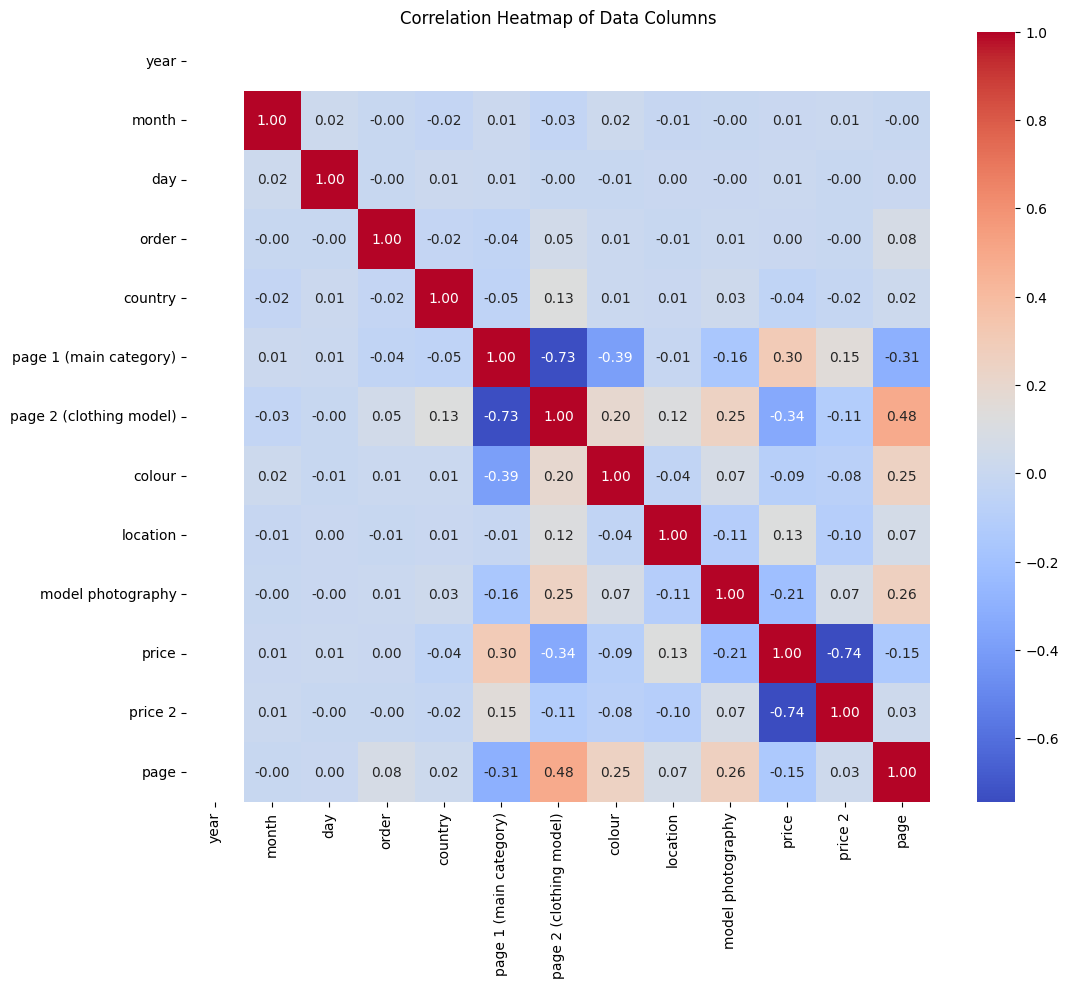

In [31]:
# From the mapping libraries using the correlation matrix function map out the correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Data Columns')
plt.show()

[link text](https://)The decision to drop columns such as 'month', 'day', 'order', 'session ID', and 'page' stems from their identified weak correlation with the target variables under analysis. This observed low correlation indicates their limited influence on or relevance to explaining variations in the target variables

In [32]:
columns_to_drop = ['year','month', 'day', 'order', 'page']

scaled_df_filtered = scaled_df.drop(columns=columns_to_drop)
scaled_df_filtered

,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2
0,0.273988,1.224226,-1.332005,-1.234220,-1.502777,-0.592858,-1.259355,1
1,0.273988,1.224226,-1.281258,-1.234220,-0.305576,-0.592858,-0.860888,1
2,0.273988,0.349663,-0.215558,0.890630,0.293024,-0.592858,0.653286,0
3,0.273988,0.349663,-0.536960,-0.053748,-0.305576,1.686743,-0.462421,1
4,0.273988,0.349663,-0.147895,-0.525937,1.490224,1.686743,0.653286,0
...,...,...,...,...,...,...,...,...
165469,0.273988,0.349663,-0.655371,-0.998126,-0.904177,-0.592858,1.848687,0
165470,-2.483332,1.224226,-1.365837,-0.762031,-0.904177,-0.592858,1.450220,0
165471,0.999599,1.224226,-1.213594,-0.762031,0.891624,-0.592858,-0.063954,1
165472,0.999599,-1.399462,0.072012,1.362819,0.891624,-0.592858,-0.063954,0


In [33]:
new_df = scaled_df.iloc[:, :-1]
new_df

,year,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,page
0,0.0,-1.289333,-1.592203,-1.638411,0.273988,1.224226,-1.332005,-1.234220,-1.502777,-0.592858,-1.259355,-0.722882
1,0.0,-1.289333,-1.592203,0.186173,0.273988,1.224226,-1.281258,-1.234220,-0.305576,-0.592858,-0.860888,-0.722882
2,0.0,-1.289333,-1.592203,0.373747,0.273988,0.349663,-0.215558,0.890630,0.293024,-0.592858,0.653286,-0.722882
3,0.0,-1.289333,-1.592203,0.561322,0.273988,0.349663,-0.536960,-0.053748,-0.305576,1.686743,-0.462421,-0.722882
4,0.0,-1.289333,-1.592203,0.748896,0.273988,0.349663,-0.147895,-0.525937,1.490224,1.686743,0.653286,-0.722882
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,0.0,-0.630744,-1.164040,-1.638411,0.273988,0.349663,-0.655371,-0.998126,-0.904177,-0.592858,1.848687,-0.722882
165470,0.0,-0.630744,-1.164040,-1.638411,-2.483332,1.224226,-1.365837,-0.762031,-0.904177,-0.592858,1.450220,-0.722882
165471,0.0,-0.630744,-1.164040,-1.638411,0.999599,1.224226,-1.213594,-0.762031,0.891624,-0.592858,-0.063954,-0.722882
165472,0.0,-0.630744,-1.164040,0.186173,0.999599,-1.399462,0.072012,1.362819,0.891624,-0.592858,-0.063954,-0.722882


In [34]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Instantiate Lasso model
lasso = Lasso(alpha=0.1)  # Set the regularization parameter (alpha) - tune for best results

# Fit the Lasso model
lasso.fit(scaled_data, data['price 2'])
print(lasso.coef_)

# Get selected features (non-zero coefficients)
selected_features = new_df.columns[lasso.coef_ != 0]  # Assuming X is a pandas DataFrame

# Print selected features
print("Selected Features:")
print(selected_features)

[ 0.          0.          0.          0.         -0.          0.04754811
 -0.02021266 -0.         -0.         -0.         -0.29273915 -0.        ]
Selected Features:
Index(['page 1 (main category)', 'page 2 (clothing model)', 'price'], dtype='object')


# PCA

   year     month       day     order   country  page 1 (main category)  \
0   0.0 -1.289333 -1.592203 -1.638411  0.273988                1.224226   
1   0.0 -1.289333 -1.592203  0.186173  0.273988                1.224226   
2   0.0 -1.289333 -1.592203  0.373747  0.273988                0.349663   
3   0.0 -1.289333 -1.592203  0.561322  0.273988                0.349663   
4   0.0 -1.289333 -1.592203  0.748896  0.273988                0.349663   

   page 2 (clothing model)    colour  location  model photography     price  \
0                -1.332005 -1.234220 -1.502777          -0.592858 -1.259355   
1                -1.281258 -1.234220 -0.305576          -0.592858 -0.860888   
2                -0.215558  0.890630  0.293024          -0.592858  0.653286   
3                -0.536960 -0.053748 -0.305576           1.686743 -0.462421   
4                -0.147895 -0.525937  1.490224           1.686743  0.653286   

       page  price 2  
0 -0.722882        1  
1 -0.722882        1  
2 -0.

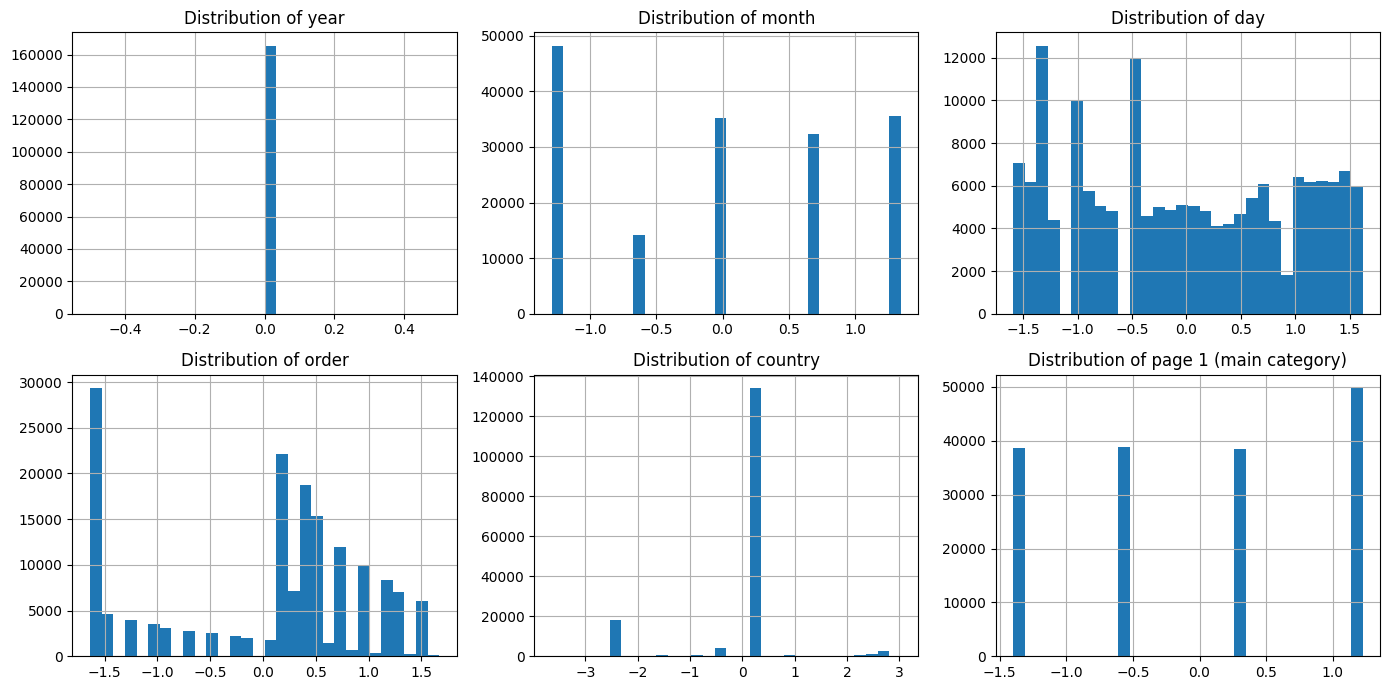

In [35]:
import pandas as pd
from tqdm.auto import tqdm

df = scaled_df
# Display the head of the dataframe
tqdm.pandas()
print(df.head())

# Plotting distributions of a few columns to get a sense of the data
import matplotlib.pyplot as plt

def plot_distributions(dataframe, columns, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 7))
    axes = axes.flatten()
    for i, col in enumerate(columns):
        dataframe[col].hist(ax=axes[i], bins=30)
        axes[i].set_title('Distribution of ' + col)
        plt.tight_layout()

# Selecting a subset of columns for plotting
# We will plot the first 6 numerical columns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_columns = numerical_columns[:6] if len(numerical_columns) >= 6 else numerical_columns
plot_distributions(df, plot_columns, n_rows=2, n_cols=3)
plt.show()

In [36]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

# Check the correlation matrix to assess linearity
correlation_matrix = df.corr()
print('\nCorrelation matrix:\n', correlation_matrix)

# Check the sample size
sample_size = df.shape[0]
num_variables = df.shape[1]
print('\nSample size:', sample_size)
print('Number of variables:', num_variables)
#
# Standardization check
# Since the values seem centered around zero, we assume standardization has been done.
# However, we will check the mean and standard deviation to confirm.
mean_std = df.describe().loc[['mean', 'std']]
print('\nMean and standard deviation of each column:\n', mean_std)

Missing values in each column:
 year                       0
month                      0
day                        0
order                      0
country                    0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
page                       0
price 2                    0
dtype: int64

Correlation matrix:
                          year     month       day     order   country  \
year                      NaN       NaN       NaN       NaN       NaN   
month                     NaN  1.000000  0.021294 -0.001997 -0.023159   
day                       NaN  0.021294  1.000000 -0.001700  0.012467   
order                     NaN -0.001997 -0.001700  1.000000 -0.021807   
country                   NaN -0.023159  0.012467 -0.021807  1.000000   
page 1 (main category)    NaN  0.013919  0.009479 -0.035736 -0.054787   
page 2 (clothing model)   NaN -0.030387 -0.00

The dataset has no missing values, which is ideal for performing PCA. The sample size is 165,474, which is quite large, and there are 14 variables in the dataset. This is a good ratio, as the sample size is much larger than the number of variables.
The mean and standard deviation of each column suggest that the data has already been standardized, which is a prerequisite for PCA to ensure that all variables contribute equally to the analysis.
The next step is to examine the correlation matrix to assess the relationships between variables. If there are high correlations between variables, PCA may be beneficial. I will now proceed to analyze the correlation matrix and then determine if PCA is suitable for this dataset.

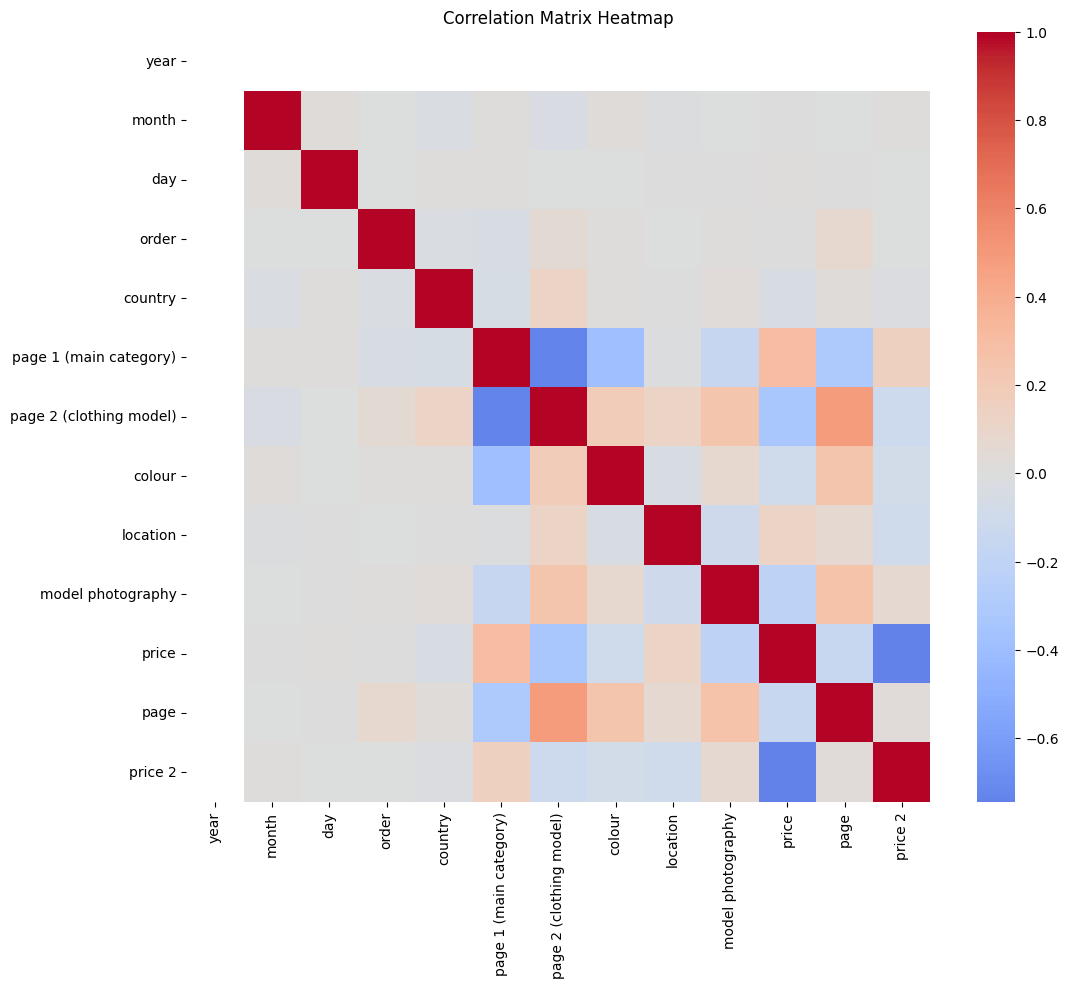

In [37]:
# Displaying the correlation matrix with better visualization using seaborn heatmap
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
new_df = scaled_df.iloc[:, :-1]
new_df

,year,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,page
0,0.0,-1.289333,-1.592203,-1.638411,0.273988,1.224226,-1.332005,-1.234220,-1.502777,-0.592858,-1.259355,-0.722882
1,0.0,-1.289333,-1.592203,0.186173,0.273988,1.224226,-1.281258,-1.234220,-0.305576,-0.592858,-0.860888,-0.722882
2,0.0,-1.289333,-1.592203,0.373747,0.273988,0.349663,-0.215558,0.890630,0.293024,-0.592858,0.653286,-0.722882
3,0.0,-1.289333,-1.592203,0.561322,0.273988,0.349663,-0.536960,-0.053748,-0.305576,1.686743,-0.462421,-0.722882
4,0.0,-1.289333,-1.592203,0.748896,0.273988,0.349663,-0.147895,-0.525937,1.490224,1.686743,0.653286,-0.722882
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,0.0,-0.630744,-1.164040,-1.638411,0.273988,0.349663,-0.655371,-0.998126,-0.904177,-0.592858,1.848687,-0.722882
165470,0.0,-0.630744,-1.164040,-1.638411,-2.483332,1.224226,-1.365837,-0.762031,-0.904177,-0.592858,1.450220,-0.722882
165471,0.0,-0.630744,-1.164040,-1.638411,0.999599,1.224226,-1.213594,-0.762031,0.891624,-0.592858,-0.063954,-0.722882
165472,0.0,-0.630744,-1.164040,0.186173,0.999599,-1.399462,0.072012,1.362819,0.891624,-0.592858,-0.063954,-0.722882


In [39]:
# Apply PCA to the standardized features
pca = PCA()
pca.fit(new_df)

# Determine the number of components that explain at least 95% of the variance
explained_variance = pca.explained_variance_ratio_.cumsum()
n_components = (explained_variance < 0.95).sum() + 1

# Apply PCA again with the determined number of components
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(scaled_df)

# Create a DataFrame of the PCA results
pca_df = pd.DataFrame(pca_features)

# Display the head of the PCA DataFrame and the number of components

print('Number of components chosen:', n_components)

# The amount of variance that each PC explains
var_ratio = pca.explained_variance_ratio_
print('Variance explained by each component:', var_ratio)

# The cumulative variance explained
cum_var_ratio = var_ratio.cumsum()
print('Cumulative variance explained:', cum_var_ratio)

Number of components chosen: 10
Variance explained by each component: [0.22422797 0.10913887 0.09390678 0.09077597 0.089226   0.08543718
 0.08445927 0.08043477 0.063271   0.05718464]
Cumulative variance explained: [0.22422797 0.33336684 0.42727362 0.51804959 0.60727559 0.69271277
 0.77717205 0.85760682 0.92087782 0.97806245]


In [40]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.796625,-2.383240,-1.597109,-1.205337,1.594362,-0.016017,0.252033,-0.316419,0.104540,0.976188
1,-1.793974,-1.233282,-1.135940,-1.939091,0.240947,0.378554,-0.206494,-0.653696,0.498823,0.374128
2,-0.629830,0.892900,-0.342161,-1.732273,1.011242,-0.682663,-0.732129,-0.044971,0.439237,-0.499811
3,-0.079478,-1.361100,-0.579379,-2.053572,0.089343,0.087665,-0.279373,0.749229,0.493816,-1.252617
4,-0.371725,0.661433,-0.937312,-2.153593,-0.383989,0.755645,0.075406,1.196272,0.159712,-1.789885


# Splitting the data

In [41]:
#Random shuffling
df_resample = scaled_df.sample(n = len(data))
df_reset = df_resample.reset_index(drop = True)
#70% training and 30% training + validation
df_valid_test=df_reset.sample(frac=0.30)
#15% test and 15% valdiation
df_test = df_valid_test.sample(frac = 0.5)
df_valid = df_valid_test.drop(df_test.index)
df_train=df_reset.drop(df_valid_test.index)

In [42]:
#Splitting data
X_train = df_test.loc[:, df_test.columns != 'price 2']
y_train = df_test['price 2']
X_valid = df_valid.loc[:, df_valid.columns != 'price 2']
y_valid = df_valid['price 2']
X_test =  df_test.loc[:, df_test.columns != 'price 2']
y_test = df_test['price 2']

Evaluation Metrics

In [43]:
# Pulling the accuracy metrics from the sklearn library to calculate scores
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
    print(f'AUC : {auc}')
    print(f'Accuracy : {accuracy}')
    print(f'Recall : {recall}')
    print(f'Precision : {precision}')
    print(f'Specificity : {specificity}')
    return auc, accuracy, recall, precision, specificity

In [44]:
# Set the threshold to 0.5
thresh = 0.5

# Logistic Regression without lasso(feature selection)

Splitting the data

In [45]:
#Random shuffling
df_resample = scaled_df_filtered.sample(n = len(data))
df_reset = df_resample.reset_index(drop = True)
#70% training and 30% training + validation
df_valid_test=df_reset.sample(frac=0.30)
#15% test and 15% valdiation
df_test = df_valid_test.sample(frac = 0.5)
df_valid = df_valid_test.drop(df_test.index)
df_train=df_reset.drop(df_valid_test.index)

In [46]:
#Splitting data
X_train = df_test.loc[:, df_test.columns != 'price 2']
y_train = df_test['price 2']
X_valid = df_valid.loc[:, df_valid.columns != 'price 2']
y_valid = df_valid['price 2']
X_test =  df_test.loc[:, df_test.columns != 'price 2']
y_test = df_test['price 2']

In [47]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Print the coefficient and Intercept
print(lr.coef_, lr.intercept_)

[[ -0.20786719   3.17999773  -3.35402411   0.93376406   0.35026122
   -0.23871002 -10.42319872]] [0.08714385]


In [49]:
# Printing predictions
y_train_preds = lr.predict_proba(X_train)[:,1]
y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC : 0.9960837365217972
Accuracy : 0.9812658635832561
Recall : 0.9667686203190874
Precision : 0.9946419459091682
Specificity : 0.9950487268154669
Validation:
AUC : 0.996493617051594
Accuracy : 0.9835220176463478
Recall : 0.9701953581566205
Precision : 0.9955452754219138
Specificity : 0.9959511017674998


In [50]:
# Defining the Logistic Regression Class
class LogisticRegression:
    def __init__(self, X_train, y_train,X_test,y_test,learningRate, tolerance, maxIteration=5000, index=[], drop=False):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.drop=drop

# Defining the Add
    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])

# Defining the Sigmoid
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig

# Defining the Cost Function
    def costFunction(self,X,y):
        sig=self.sigmoid(X.dot(self.w))
        pred=y*np.log(sig)+(1-y)*np.log(1-sig)
        cost=pred.sum()
        return cost

# Defining the Gradient
    def gradient(self, X,y):
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad

# Defining the Gradient Descent
    def gradientDescent(self,X,y):
        costSequence=[]
        last=float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate*(self.gradient(X,y))
            cur_cost= self.costFunction(X,y)
            diff=last-cur_cost
            costSequence.append(abs(cur_cost))
            if diff<self.tolerance:
                print("Model stopped")
                break
        self.plotCost(costSequence)
        return

# Defining the Plot Cost
    def plotCost(self, costSequence):
        axis=list(range(0, len(costSequence),1))
        fig, ax = plt.subplots()
        ax.plot(axis, costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost Function')
        ax.set_title('Cost Function')
        ax.grid()
        plt.show()

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        accuracy= (y==y_hat).sum()/y.size
        recall=(y&y_hat).sum()/y.sum()
        return accuracy, recall

    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.X_train, self.y_train, self.X_test, self.y_test
        self.w=np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.gradientDescent(self.X_train, self.y_train)
        print('The model params are {}'.format(self.w))
        param_string = "[" + " ".join("{:.2e}".format(param) for param in self.w) + "]"
        print('The model params are {}'.format(param_string))

        y_hat_train=self.predict(self.X_train)
        accuracy, recall = self.evaluate(self.y_train, y_hat_train)

        print("Evaluation for training data: \n")
        print("Accuracy", accuracy)
        print("Recall", recall)

        y_hat_test=self.predict(self.X_test)
        accuracy_test, recall_test = self.evaluate(self.y_test, y_hat_test)

        print("\nEvaluation for test data: \n")
        print("Accuracy", accuracy_test)
        print("Recall", recall_test)


        return

In [51]:
# Calculating the Regression
regression = LogisticRegression(X_train, y_train, X_valid, y_valid, learningRate=0.000000001, tolerance=0.001)

  0%|          | 0/5000 [00:00<?, ?it/s]

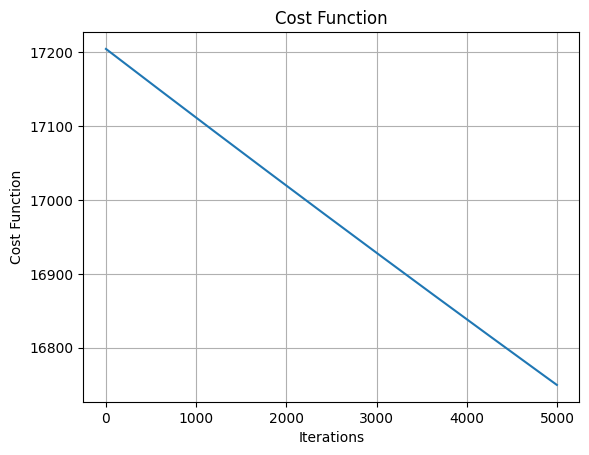

The model params are country                   -0.001606
page 1 (main category)     0.009491
page 2 (clothing model)   -0.007205
colour                    -0.005255
location                  -0.005668
model photography          0.004495
price                     -0.045275
dtype: float64
The model params are [-1.61e-03 9.49e-03 -7.21e-03 -5.25e-03 -5.67e-03 4.49e-03 -4.53e-02]
Evaluation for training data: 

Accuracy 0.9161597034768946
Recall 0.9617260477804415

Evaluation for test data: 

Accuracy 0.9181338382820998
Recall 0.9661045249624312


In [52]:
# Mapping the regression Model
regression.runModel()

In [53]:
# Calculating the Regression with Tolerance at a significant detail
regression=LogisticRegression(X_train,y_train,X_test,y_test,learningRate=0.00000000001,tolerance=0.0000001)

  0%|          | 0/5000 [00:00<?, ?it/s]

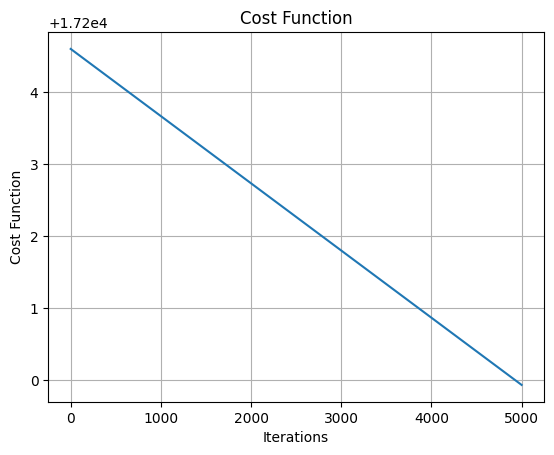

The model params are country                   -0.000016
page 1 (main category)     0.000095
page 2 (clothing model)   -0.000072
colour                    -0.000053
location                  -0.000059
model photography          0.000047
price                     -0.000459
dtype: float64
The model params are [-1.63e-05 9.53e-05 -7.20e-05 -5.34e-05 -5.86e-05 4.67e-05 -4.59e-04]
Evaluation for training data: 

Accuracy 0.9161597034768946
Recall 0.9617260477804415

Evaluation for test data: 

Accuracy 0.9161597034768946
Recall 0.9617260477804415


In [54]:
# Running the Regression Model
regression.runModel()

# Logistic Regression with lasso(Feauture Selection)

In [55]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Instantiate Lasso model
lasso = Lasso(alpha=0.1)  # Set the regularization parameter (alpha) - tune for best results

# Fit the Lasso model
lasso.fit(scaled_data, data['price 2'])
print(lasso.coef_)

# Get selected features (non-zero coefficients)
selected_features = new_df.columns[lasso.coef_ != 0]  # Assuming X is a pandas DataFrame

# Print selected features
print("Selected Features:")
print(selected_features)

[ 0.          0.          0.          0.         -0.          0.04754811
 -0.02021266 -0.         -0.         -0.         -0.29273915 -0.        ]
Selected Features:
Index(['page 1 (main category)', 'page 2 (clothing model)', 'price'], dtype='object')


we found that 'page 1 (main category)', 'price' columns are highly corelated to the target variables

In [56]:
scaled_df

,year,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,page,price 2
0,0.0,-1.289333,-1.592203,-1.638411,0.273988,1.224226,-1.332005,-1.234220,-1.502777,-0.592858,-1.259355,-0.722882,1
1,0.0,-1.289333,-1.592203,0.186173,0.273988,1.224226,-1.281258,-1.234220,-0.305576,-0.592858,-0.860888,-0.722882,1
2,0.0,-1.289333,-1.592203,0.373747,0.273988,0.349663,-0.215558,0.890630,0.293024,-0.592858,0.653286,-0.722882,0
3,0.0,-1.289333,-1.592203,0.561322,0.273988,0.349663,-0.536960,-0.053748,-0.305576,1.686743,-0.462421,-0.722882,1
4,0.0,-1.289333,-1.592203,0.748896,0.273988,0.349663,-0.147895,-0.525937,1.490224,1.686743,0.653286,-0.722882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,0.0,-0.630744,-1.164040,-1.638411,0.273988,0.349663,-0.655371,-0.998126,-0.904177,-0.592858,1.848687,-0.722882,0
165470,0.0,-0.630744,-1.164040,-1.638411,-2.483332,1.224226,-1.365837,-0.762031,-0.904177,-0.592858,1.450220,-0.722882,0
165471,0.0,-0.630744,-1.164040,-1.638411,0.999599,1.224226,-1.213594,-0.762031,0.891624,-0.592858,-0.063954,-0.722882,1
165472,0.0,-0.630744,-1.164040,0.186173,0.999599,-1.399462,0.072012,1.362819,0.891624,-0.592858,-0.063954,-0.722882,0


In [57]:
# Assuming df is your DataFrame
columns_to_keep = ['page 1 (main category)','page 2 (clothing model)','price','price 2']
df_lasso = scaled_df[columns_to_keep]
df_lasso

,page 1 (main category),page 2 (clothing model),price,price 2
0,1.224226,-1.332005,-1.259355,1
1,1.224226,-1.281258,-0.860888,1
2,0.349663,-0.215558,0.653286,0
3,0.349663,-0.536960,-0.462421,1
4,0.349663,-0.147895,0.653286,0
...,...,...,...,...
165469,0.349663,-0.655371,1.848687,0
165470,1.224226,-1.365837,1.450220,0
165471,1.224226,-1.213594,-0.063954,1
165472,-1.399462,0.072012,-0.063954,0


In [58]:
# Random shuffling
df_resample_l = df_lasso.sample(n=len(data))
df_reset_l = df_resample_l.reset_index(drop=True)

# 70% training and 30% training + validation
df_valid_test_l = df_reset_l.sample(frac=0.30)

# 15% test and 15% validation
df_test_l = df_valid_test_l.sample(frac=0.5)
df_valid_l = df_valid_test_l.drop(df_test_l.index)  # Drop test indices from validation set

df_train_l = df_reset_l.drop(df_valid_test_l.index)  # Drop validation and test indices from training set


In [59]:
#Splitting data
X_train_l = df_test_l.loc[:, df_test_l.columns != 'price 2']
y_train_l = df_test_l['price 2']
X_valid_l = df_valid_l.loc[:, df_valid_l.columns != 'price 2']
y_valid_l = df_valid_l['price 2']
X_test_l =  df_test_l.loc[:, df_test_l.columns != 'price 2']
y_test_l = df_test_l['price 2']

In [60]:
# Defining the Logistic Regression Class
class LogisticRegression:
    def __init__(self, X_train, y_train,X_test,y_test,learningRate, tolerance, maxIteration=5000, index=[], drop=False):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.drop=drop

# Defining the Add
    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])

# Defining the Sigmoid
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig

# Defining the Cost Function
    def costFunction(self,X,y):
        sig=self.sigmoid(X.dot(self.w))
        pred=y*np.log(sig)+(1-y)*np.log(1-sig)
        cost=pred.sum()
        return cost

# Defining the Gradient
    def gradient(self, X,y):
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad

# Defining the Gradient Descent
    def gradientDescent(self,X,y):
        costSequence=[]
        last=float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate*(self.gradient(X,y))
            cur_cost= self.costFunction(X,y)
            diff=last-cur_cost
            costSequence.append(abs(cur_cost))
            if diff<self.tolerance:
                print("Model stopped")
                break
        self.plotCost(costSequence)
        return

# Defining the Plot Cost
    def plotCost(self, costSequence):
        axis=list(range(0, len(costSequence),1))
        fig, ax = plt.subplots()
        ax.plot(axis, costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost Function')
        ax.set_title('Cost Function')
        ax.grid()
        plt.show()

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        accuracy= (y==y_hat).sum()/y.size
        recall=(y&y_hat).sum()/y.sum()
        return accuracy, recall

    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.X_train, self.y_train, self.X_test, self.y_test
        self.w=np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.gradientDescent(self.X_train, self.y_train)
        print('The model params are {}'.format(self.w))
        param_string = "[" + " ".join("{:.2e}".format(param) for param in self.w) + "]"
        print('The model params are {}'.format(param_string))

        y_hat_train=self.predict(self.X_train)
        accuracy, recall = self.evaluate(self.y_train, y_hat_train)

        print("Evaluation for training data: \n")
        print("Accuracy", accuracy)
        print("Recall", recall)

        y_hat_test=self.predict(self.X_test)
        accuracy_test, recall_test = self.evaluate(self.y_test, y_hat_test)

        print("\nEvaluation for test data: \n")
        print("Accuracy", accuracy_test)
        print("Recall", recall_test)


        return

In [61]:
# Calculating the Regression
regression = LogisticRegression(X_train_l, y_train_l, X_valid_l, y_valid_l, learningRate=0.000000001, tolerance=0.001)

  0%|          | 0/5000 [00:00<?, ?it/s]

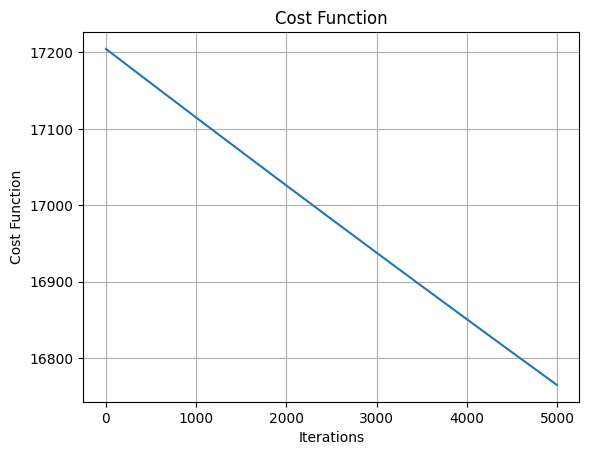

The model params are page 1 (main category)     0.008407
page 2 (clothing model)   -0.006243
price                     -0.045694
dtype: float64
The model params are [8.41e-03 -6.24e-03 -4.57e-02]
Evaluation for training data: 

Accuracy 0.926836146811168
Recall 0.9807644473924219

Evaluation for test data: 

Accuracy 0.9300189355787438
Recall 0.9825200894706321


In [62]:
# Mapping the regression Model
regression.runModel()

In [63]:
# Calculating the Regression with Tolerance at a significant detail
regression=LogisticRegression(X_train,y_train,X_test,y_test,learningRate=0.00000000001,tolerance=0.0000001)

  0%|          | 0/5000 [00:00<?, ?it/s]

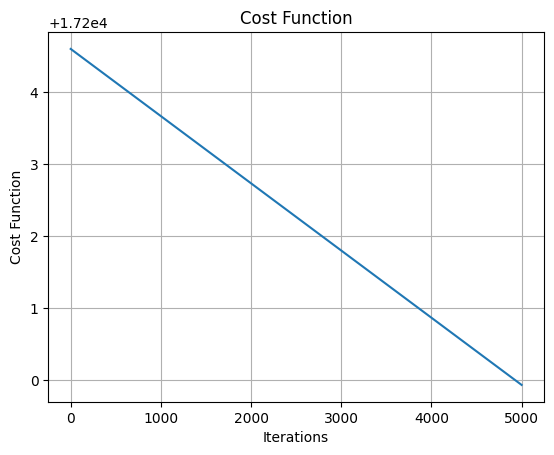

The model params are country                   -0.000016
page 1 (main category)     0.000095
page 2 (clothing model)   -0.000072
colour                    -0.000053
location                  -0.000059
model photography          0.000047
price                     -0.000459
dtype: float64
The model params are [-1.63e-05 9.53e-05 -7.20e-05 -5.34e-05 -5.86e-05 4.67e-05 -4.59e-04]
Evaluation for training data: 

Accuracy 0.9161597034768946
Recall 0.9617260477804415

Evaluation for test data: 

Accuracy 0.9161597034768946
Recall 0.9617260477804415


In [64]:
# Running the Regression Model
regression.runModel()

# Naive Bayes

In [65]:
# Prepping the data for Calculating Naive Bayes
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [66]:
# Creating a Data Class for Naive Bayes
@dataclass
class NaiveBayesClassifier:
    prob_class : dict = field(default_factory=dict)
    prob_features : dict = field(default_factory=dict)
    threshold : int = 10

# Defining Fit
    def fit(self, X, y):
        print("fitting on X_train values....")
        X = X.values
        y = y.values
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        for cls in self.classes:
            X_c = X[y == cls]
            self.prob_class[cls] = len(X_c) / n_samples

            for i in range(n_features):
                if i not in self.prob_features:
                    self.prob_features[i] = {}

                if len(np.unique(X[:,i])) <= self.threshold:
                    counts = Counter(X_c[:,i])
                    for value, count in counts.items():
                        self.prob_features[i][(value, cls)] = count / len(X_c)
                else:
                    mean = np.mean(X_c[:,i])
                    std = np.std(X_c[:,i])
                    self.prob_features[i][cls] = (mean, std)
        print("training complete..")
        return None

# Defining Predict Function
    def predict(self, X):
        X = X.values
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        y_pred = []
        for x in X:
            probs = {}
            for cls in self.classes:
                prob_class = self.prob_class[cls]
                prob_features = self.prob_features.copy()
                for i, value in enumerate(x):
                    if i in prob_features:
                        if len(prob_features[i]) <= self.threshold:
                            if (value, cls) in prob_features[i]:
                                feature_prob = prob_features[i][(value, cls)]
                            else:
                                feature_prob = 1e-6
                        else:
                            if cls in prob_features[i]:
                                mean, std = prob_features[i][cls]
                                feature_prob = self._gaussian_prob(value, mean, std)
                            else:
                                feature_prob = 1e-6
                        prob_class *= feature_prob
                probs[cls] = prob_class
            y_pred.append(max(probs, key=probs.get))
        return y_pred

# Defining Gaussian Probability
    def _gaussian_prob(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Defining Evaluation Function
    def evaluation(self, y_pred, y):
        print("calculating precision, recall, f1_score, accuracy")
        y = y.values
        y_pred = pd.DataFrame(y_pred, columns=['y_pred'])
        tp = ((y_pred['y_pred'] == 1) & (y == 1)).sum()
        fp = ((y_pred['y_pred'] == 1) & (y == 0)).sum()
        tn = ((y_pred['y_pred'] == 0) & (y == 0)).sum()
        fn = ((y_pred['y_pred'] == 0) & (y == 1)).sum()

        accuracy = (tp + tn) / len(y_pred)
        f1_score = 2 * tp / (2 * tp + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        cm = confusion_matrix(y, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

        print(f"Accuracy: {accuracy}\nF1 Score: {f1_score}\nPrecision: {precision}\nRecall: {recall}")
        return None


In [67]:
# Classifying the Naive Bayes Classifier
clf = NaiveBayesClassifier(threshold = 26)

In [68]:
# Printing the classification prediction
clf.fit(X_train_l, y_train_l)

fitting on X_train values....
training complete..


In [69]:
# Calculating the y prediction
y_pred = clf.predict(X_test_l)

calculating precision, recall, f1_score, accuracy


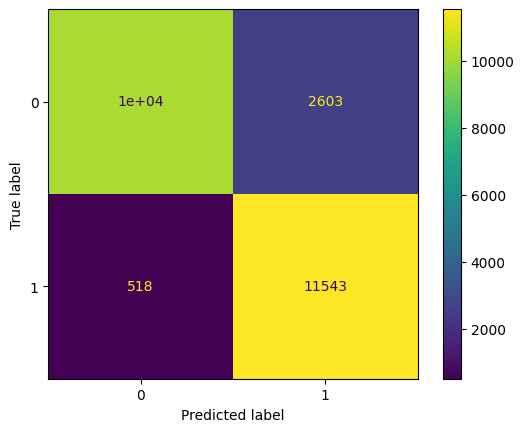

Accuracy: 0.874259699448048
F1 Score: 0.8809096806196818
Precision: 0.8159903859748339
Recall: 0.9570516540917006


In [70]:
# Calculating the Precision and other stats
clf.evaluation(y_pred, y_test_l)

In [71]:
# Preparing the Classification Report from Sklearn library
from sklearn.metrics import classification_report
print("Test Data")
print(classification_report(y_test_l, y_pred))

# Printing the Training Data
print("Training Data")
print(classification_report(y_train_l, clf.predict(X_train_l)))

Test Data
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     12760
           1       0.82      0.96      0.88     12061

    accuracy                           0.87     24821
   macro avg       0.88      0.88      0.87     24821
weighted avg       0.89      0.87      0.87     24821

Training Data
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     12760
           1       0.82      0.96      0.88     12061

    accuracy                           0.87     24821
   macro avg       0.88      0.88      0.87     24821
weighted avg       0.89      0.87      0.87     24821



# KNN

In [72]:
# Importing the libraries for KNN calculations
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [73]:
# Defining the KNN Classifier
@dataclass
class KNNClassifier:
    k: int = 3

# Defining the Fit
    def fit(self, X_train, y_train):
        self.X_train = X_train.values
        self.y_train = y_train.values

# Defining the Predict
    def predict(self, X_test):
        X_test = X_test.values
        if len(X_test.shape) == 1:
            X_test = X_test.reshape(-1, 1)

        y_pred = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[indices]

            # Use a Counter to find the most common label
            most_common = Counter(k_nearest_labels)
            predicted_label = most_common.most_common(1)[0][0]
            y_pred.append(predicted_label)

        return y_pred

# Defining the Evaluation
    def evaluation(self, y_pred, y_true):
        print("\x1B[3mcalculating precision, recall, f1_score, accuracy\x1B[0m....")

        y_true = y_true.values
        y_pred = np.array(y_pred)

        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))

        accuracy = (tp + tn) / len(y_true)
        f1_score = 2 * tp / (2 * tp + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

        print(f"\033[1mAccuracy:\033[0m {accuracy}\n\033[1mF1 Score:\033[0m {f1_score}\n\033[1mPrecision:\033[0m {precision}\n\033[1mRecall:\033[0m {recall}")
        return None


calculating precision, recall, f1_score, accuracy....


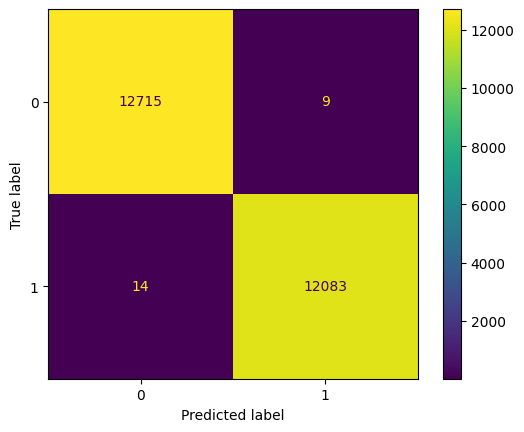

Accuracy: 0.9990733652955159
F1 Score: 0.9990491545743934
Precision: 0.9992557062520675
Recall: 0.9988426882698189


In [74]:
# Instantiate the KNNClassifier
knn_classifier = KNNClassifier(k=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
knn_classifier.evaluation(y_pred, y_test)

# Neural Networks

In [75]:
pip install tensorflow

In [76]:
# Importing necessary libraries for Tensor Flow Coding
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import Activation, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [77]:
# Defining various models
model = Sequential()
model.add(Dense(142, input_dim=7, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [78]:
# Compiling the data
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [79]:
# Plotting the Model Fit statistics
history=model.fit(X_train, y_train, epochs=8, validation_split=0.15, verbose=1, batch_size=64)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



329/330 [============================>.] - ETA: 0s - loss: 0.5737 - sparse_categorical_accuracy: 0.8223

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



330/330 [==============================] - 5s 13ms/step - loss: 0.5735 - sparse_categorical_accuracy: 0.8225 - val_loss: 0.4266 - val_sparse_categorical_accuracy: 0.9251
Epoch 2/8
330/330 [==============================] - 4s 12ms/step - loss: 0.2799 - sparse_categorical_accuracy: 0.9520 - val_loss: 0.1676 - val_sparse_categorical_accuracy: 0.9764
Epoch 3/8
330/330 [==============================] - 4s 11ms/step - loss: 0.1215 - sparse_categorical_accuracy: 0.9737 - val_loss: 0.0885 - val_sparse_categorical_accuracy: 0.9756
Epoch 4/8
330/330 [==============================] - 4s 13ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9801
Epoch 5/8
330/330 [==============================] - 5s 14ms/step - loss: 0.0568 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.0489 - val_sparse_categorical_accuracy: 0.9858
Epoch 6/8
330/330 [==============================] - 4s 11ms/step - loss: 0.0452 - sparse_categorical_accuracy

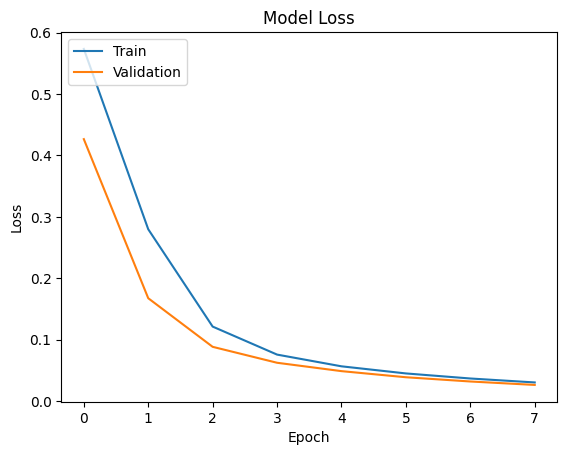

In [80]:
# Evaluate the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [81]:
# Defining the prediction Model
y_pred = model.predict(X_test)

776/776 [==============================] - 2s 3ms/step


In [82]:
# Defining the List Variables
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

Streaming output truncated to the last 5000 lines.
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
1
0
1
1
1
0
0
1
0
0
0
1
0
0
0
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
0
1
0
0
0
0
1
1
0
1
0
0
0
1
1
1
0
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
1
0
0
1
0
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
1
1
0
0
1
1
1
0
0
1
0
0
1
0
0
1
0
1
1
1
1
0
0
0
0
1
0
0
0
1
1
1
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
1
0
0
1
1
1
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
1
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
1
1
0
1
0
1
0
0
0
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
0
0
0
0
1
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
0
1
1
1
1
1
0
0
1
0
1
1
0
0
0
1

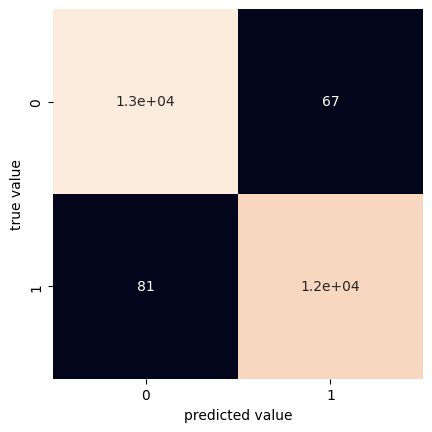

In [83]:
# Importing confusion Matrix function for mapping the matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [84]:
# Importing accuracy and recall score functions from sklearn library
from sklearn.metrics import accuracy_score, recall_score

print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_label))

Accuracy: 0.994
Recall: 0.993


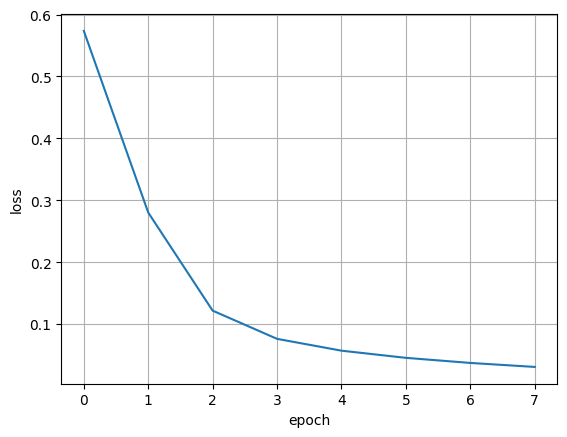

In [85]:
# Calculating the History and plotting
loss=history.history['loss']
def plot(loss):
        axis=list(range(0, len(loss),1))
        fig, ax = plt.subplots()
        ax.plot(axis, loss)
        ax.set_xlabel('epoch')
        ax.set_ylabel('loss')
        ax.grid()
        plt.show()
plot(loss)